In [1]:
#Pattern Recognition Project - 1st deliverable
#Theodoros Lioupis 9733
#Evgenia Stavrianidou 9686

In [2]:
#imports
#!pip install numpy 
#!pip install matplotlib
#!pip install scipy
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import axes3d

In [3]:
#data given for part A
m1 = [0.4,0.8] #the mean values of the 2 indeces for P(x|w1)
m2 = [1.5,2.7] #the mean values of the 2 indeces for P(x|w2)

S = np.array([1.5,0,0,0.8]) #The covariance table-1D of the 2 indeces, same for p(x|w1) an p(x|w2)
S = S.reshape(2,2) #The covariance table-2D
var1 = S[0,0] #variance of index 1, same for p(x|w1) an p(x|w2)
var2 = S[1,1] #variance of index 2, same for p(x|w1) an p(x|w2)
s1 = math.sqrt(var1) #std of index 1, same for p(x|w1) an p(x|w2)
s2 = math.sqrt(var2) #std of index 2, same for p(x|w1) an p(x|w2)

p_w1 = 0.95 #P(w1)
p_w2 = 0.05 #P(w2)

Some comments on the results:

Firstly, the indeces in reality can not take negative values.
Here we use negative values to understand better the p(X|wi).

Figure 1-2:
We see the two pdfs for the two indeces separatly.
We observe that the p(x|w2) (w2:possible cancer) is shifted to the right and even more for index 2.

Figure 3:
A random sample X = {X1,X2}.
We notice that the X of w1 do not mix a lot with the X of w2.
So, we see here too that w2 is shifted compared with w1.

Figure 4:
The two Bivariate pdfs of p(x|w1) and p(x|w2).
On the bottom we see the equal probability curves, meaning that two sets X data on the same curve have the same probability 
of being healthy or possibly having cancer.

Example:

If a set of X = {X1,X2} is on a high probability curve of p(X|w1) then we can decide that the patient is healthy.

If a set of X = {X1,X2} is on a low probability curve of p(X|w1) then we can decide that the patient is not healthy.
Furthermore, if X is at the same time on a high prob

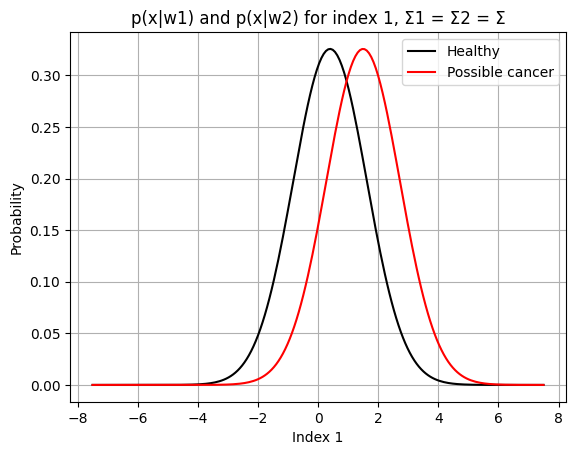

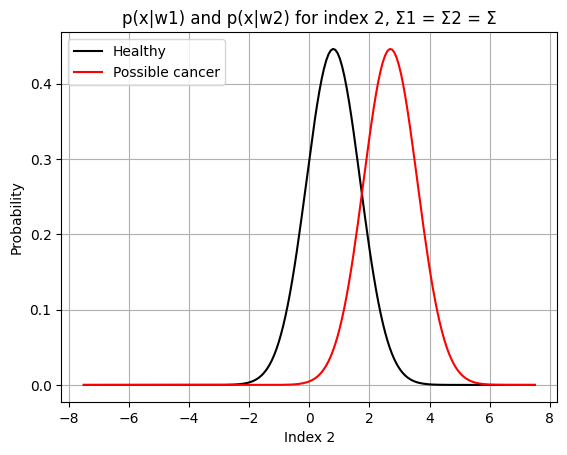

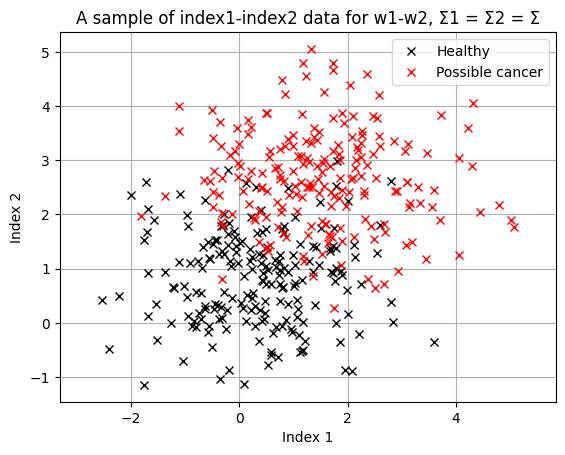

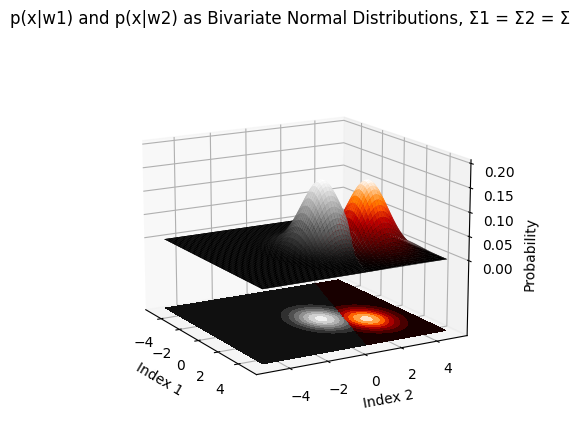

In [4]:
#Question A1

x = np.linspace(-7.5,7.5,200) #Creating a series of data in range of -7.5 to 7.5.
#In reality X can not be negative because there are not negative measurements in blood tests!!!
 
#A function to calculate Y ~ Normal Distrobution
def normal_dist(x , mean , std):
    pdf = (1/(math.sqrt(2*np.pi)*std)) * np.exp(-0.5*((x-mean)/std)**2)
    return pdf
 
#Apply the above function to x
#p(x|w1) of both medical indeces independently
pdf_w1_i1 = normal_dist(x,m1[0],s1) #index 1
pdf_w1_i2 = normal_dist(x,m1[1],s2) #index 2
#p(x|w2) of both medical indeces independently
pdf_w2_i1 = normal_dist(x,m2[0],s1) #index 1
pdf_w2_i2 = normal_dist(x,m2[1],s2) #index 2
 
#Plotting the Results for w1(Healthy) and w2(cancer) for index 1
plt.figure(1)
plt.title('p(x|w1) and p(x|w2) for index 1, Σ1 = Σ2 = Σ')
plt.plot(x,pdf_w1_i1 , color = 'black', label = 'Healthy')
plt.plot(x,pdf_w2_i1 , color = 'red', label = 'Possible cancer')
plt.legend()
plt.xlabel('Index 1')
plt.ylabel('Probability')
plt.grid()

#Plotting the Results for w1(Healthy) and w2(cancer) for index 2
plt.figure(2)
plt.title('p(x|w1) and p(x|w2) for index 2, Σ1 = Σ2 = Σ')
plt.plot(x,pdf_w1_i2 , color = 'black', label = 'Healthy')
plt.plot(x,pdf_w2_i2 , color = 'red', label = 'Possible cancer')
plt.legend()
plt.xlabel('Index 2')
plt.ylabel('Probability')
plt.grid()

#Plotting a random sample of index1-index2 data for w1-w2
plt.figure(3)
plt.title('A sample of index1-index2 data for w1-w2, Σ1 = Σ2 = Σ')
#index1-index2 data for w1
(i1_w1, i2_w1) = np.random.multivariate_normal(m1, S, 200).T
plt.plot(i1_w1, i2_w1, 'x',color = 'black', label = 'Healthy')
#index1-index2 data for w2
(i1_w2, i2_w2) = np.random.multivariate_normal(m2, S, 200).T
plt.plot(i1_w2, i2_w2,'x',color = 'red', label = 'Possible cancer')
plt.legend()
plt.axis('equal')
plt.xlabel('Index 1')
plt.ylabel('Index 2')
plt.grid()

#creating random data for the 2 indeces x1,x2
start_point = -5 #beginning of interval
end_point = 5 #ending of interval
step = 0.05
length_of_data = int((end_point-start_point)/step)
x1 = np.linspace(start_point, end_point, length_of_data)
x2 = np.linspace(start_point, end_point, length_of_data)
x1, x2 = np.meshgrid(x1,x2) 
pos = np.empty(x1.shape + (2,))
pos[:, :, 0] = x1
pos[:, :, 1] = x2
#calculating p(x|w1) and p(x|w2)
pdf_x_w1 = multivariate_normal(m1,S)
pdf_x_w2 = multivariate_normal(m2,S)
pdf_x_w1 = pdf_x_w1.pdf(pos)
pdf_x_w2 = pdf_x_w2.pdf(pos)
#plotting p(x|w1) and p(x|w2) at the same 3D-figure
fig = plt.figure(4)
fig.suptitle('p(x|w1) and p(x|w2) as Bivariate Normal Distributions, Σ1 = Σ2 = Σ')
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x1, x2, np.where(pdf_x_w1<pdf_x_w2,pdf_x_w1,np.nan), rstride=6, cstride=6, linewidth=1, antialiased=True, cmap=plt.cm.gist_gray)
ax.plot_surface(x1, x2, pdf_x_w2, rstride=3, cstride=3, linewidth=1, antialiased=True, cmap=plt.cm.gist_heat)
ax.plot_surface(x1, x2, np.where(pdf_x_w1>=pdf_x_w2,pdf_x_w1,np.nan), rstride=3, cstride=3, linewidth=1, antialiased=True, cmap=plt.cm.gist_gray)
cset = ax.contourf(x1, x2, np.where(pdf_x_w1<pdf_x_w2,pdf_x_w1,np.nan), zdir='z', offset=-0.15, cmap=plt.cm.gist_gray)
cset = ax.contourf(x1, x2, pdf_x_w2, zdir='z', offset=-0.15, cmap=plt.cm.gist_heat)
cset = ax.contourf(x1, x2,np.where(pdf_x_w1>=pdf_x_w2,pdf_x_w1,np.nan), zdir='z', offset=-0.15, cmap=plt.cm.gist_gray)
ax.set_xlabel('Index 1')
ax.set_ylabel('Index 2')
ax.set_zlabel('Probability')

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(15, -30)

print('Some comments on the results:\n')
print('Firstly, the indeces in reality can not take negative values.\nHere we use negative values to understand better the p(X|wi).\n')
print('Figure 1-2:\nWe see the two pdfs for the two indeces separatly.\nWe observe that the p(x|w2) (w2:possible cancer) is shifted to the right and even more for index 2.\n')
print('Figure 3:\nA random sample X = {X1,X2}.\nWe notice that the X of w1 do not mix a lot with the X of w2.\nSo, we see here too that w2 is shifted compared with w1.\n')
print('Figure 4:\nThe two Bivariate pdfs of p(x|w1) and p(x|w2).\nOn the bottom we see the equal probability curves, meaning that two sets X data on the same curve have the same probability \nof being healthy or possibly having cancer.\n')
print('Example:\n\nIf a set of X = {X1,X2} is on a high probability curve of p(X|w1) then we can decide that the patient is healthy.')
print('\nIf a set of X = {X1,X2} is on a low probability curve of p(X|w1) then we can decide that the patient is not healthy.\nFurthermore, if X is at the same time on a high probability curve of p(X|w2) the the patient must be tested for cancer.')
print('\nIf a set of X = {X1,X2} is at the same time on a curve of p(X|w1) and a curve of p(X|w2) of equal probability, then we can not be sure of our decision. Maybe more testing must be done to be sure.')

The figure shows us the probability of a new measurement X to be inside of a curve depending on each curves probability.


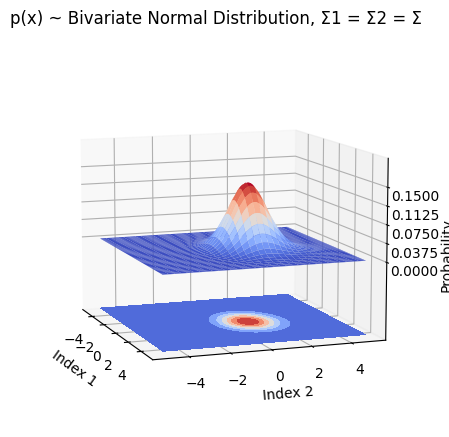

In [5]:
#Question A2

pdf_x = pdf_x_w1 * p_w1 + pdf_x_w2 * p_w2 #from theory: p(x) = p(x|w1)*P(w1) + p(x|w2)*P(w2)

#plotting p(x)
fig = plt.figure(5)
fig.suptitle('p(x) ~ Bivariate Normal Distribution, Σ1 = Σ2 = Σ')
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x1, x2, pdf_x, rstride=6, cstride=6, linewidth=1, antialiased=True, cmap=plt.cm.coolwarm)
cset = ax.contourf(x1, x2, pdf_x, zdir='z', offset=-0.15, cmap=plt.cm.coolwarm)
ax.set_xlabel('Index 1')
ax.set_ylabel('Index 2')
ax.set_zlabel('Probability')

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.15,5))
ax.view_init(10, -20)

print('The figure shows us the probability of a new measurement X to be inside of a curve depending on each curves probability.')

This figure helps us decide easier following the Bayes Decision Rule:
->If P(w1|x) > P(w2|x) we choose w1 (healthy).
->If P(w1|x) < P(w2|x) we choose w2 (possible cancer).
In other words we choose w1 where the black surface is above the red or w2 otherwise.


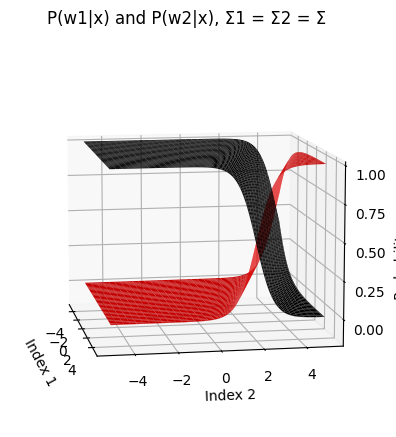

In [6]:
#Question A3

p_w1_x = (pdf_x_w1*p_w1)/pdf_x #from theory P(wi|x) = (p(x|wi)*P(wi))/p(x)
p_w2_x = (pdf_x_w2*p_w2)/pdf_x

#plotting P(w1|x) and P(w2|x)
fig = plt.figure(6)
fig.suptitle('P(w1|x) and P(w2|x), Σ1 = Σ2 = Σ')
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x1, x2, p_w1_x, rstride=6, cstride=6, linewidth=1, antialiased=True, color = 'k')
ax.plot_surface(x1, x2, p_w2_x, rstride=6, cstride=6, linewidth=1, antialiased=True, color = 'r')
ax.set_xlabel('Index 1')
ax.set_ylabel('Index 2')
ax.set_zlabel('Probability')

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,1,5))
ax.view_init(10, -10)

print('This figure helps us decide easier following the Bayes Decision Rule:')
print('->If P(w1|x) > P(w2|x) we choose w1 (healthy).')
print('->If P(w1|x) < P(w2|x) we choose w2 (possible cancer).')
print('In other words we choose w1 where the black surface is above the red or w2 otherwise.')

In [7]:
#Question A4
#we used the P(error) expression from the theory book: P(error) = Σ(p(x|w1)*P(w1)*dx) @ R2 + Σ(p(x|w2)*P(w2)*dx) @ R1
#R1 is the area where P(w1|x) > P(w2|x)
#R2 is the area where P(w2|x) > P(w1|x)
sum1 = 0; #Σ(p(x|w1)*P(w1)*dx) @ R2 
sum2 = 0; #Σ(p(x|w2)*P(w2)*dx) @ R1
dx1dx2 = step*step;
for i in range(0,len(p_w1_x)):
    for j in range(0,len(p_w1_x)):
        if p_w1_x[i][j] < p_w2_x[i][j]: #If R2
            sum1 = sum1 + (pdf_x_w1[i][j]*p_w1*dx1dx2)
        else:  #If R1
            sum2 = sum2 + (pdf_x_w2[i][j]*p_w2*dx1dx2)
Berror = sum1 + sum2
print('The Bayes error (which is also the minimum) is ', Berror, 'or',  round(Berror*100,2),'%')
print('We expected an error less than 1, so we are ok!')
print('We have a low Bayes error because we already know the probability distribution of the data.')
print('In general, the lowest the error (closer to zero), the better for our model and thus for the patient.')

The Bayes error (which is also the minimum) is  0.034261498882298354 or 3.43 %
We expected an error less than 1, so we are ok!
We have a low Bayes error because we already know the probability distribution of the data.
In general, the lowest the error (closer to zero), the better for our model and thus for the patient.


In [8]:
#data given for part B
m1 = [0.4,0.8] #the mean values of the 2 indeces for P(x|w1)
m2 = [1.5,2.7] #the mean values of the 2 indeces for P(x|w2)

S = np.array([1.5,0,0,0.8]) #The original covariance table-1D of the 2 indeces
S = S.reshape(2,2) #The original covariance table-2D
#Σ1 = Σ
var1_i1 = S[0,0] #variance of index 1, for p(x|w1)
var1_i2 = S[1,1] #variance of index 2, for p(x|w1)
s1_i1 = math.sqrt(var1_i1) #std of index 1, for p(x|w1)
s1_i2 = math.sqrt(var1_i2) #std of index 2, for p(x|w1)
#Σ2 = Σ/4
var2_i1 = S[0,0]/4 #variance of index 1, for p(x|w2)
var2_i2 = S[1,1]/4 #variance of index 2, for p(x|w2)
s2_i1 = math.sqrt(var2_i1) #std of index 1, for p(x|w2)
s2_i2 = math.sqrt(var2_i2) #std of index 2, for p(x|w2)


p_w1 = 0.95 #P(w1)
p_w2 = 0.05 #P(w2)

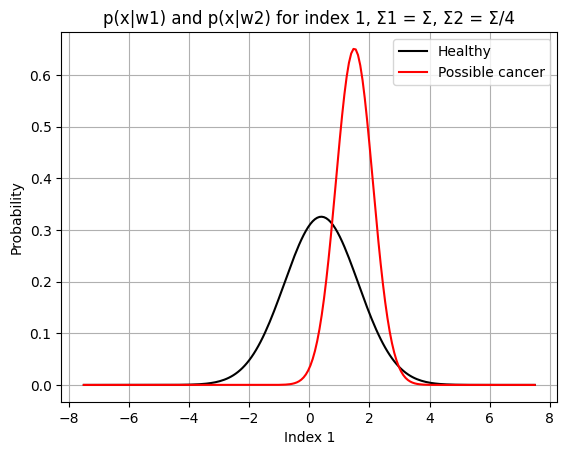

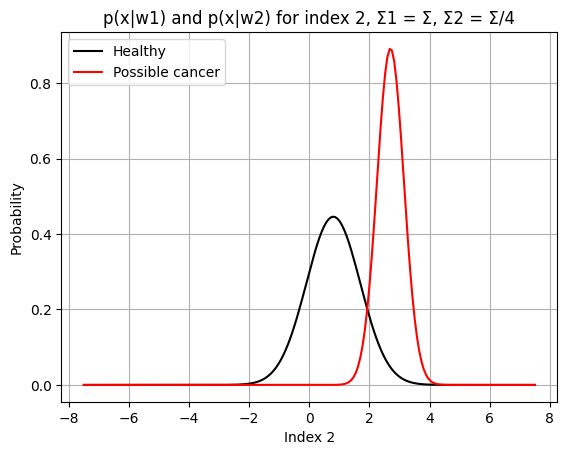

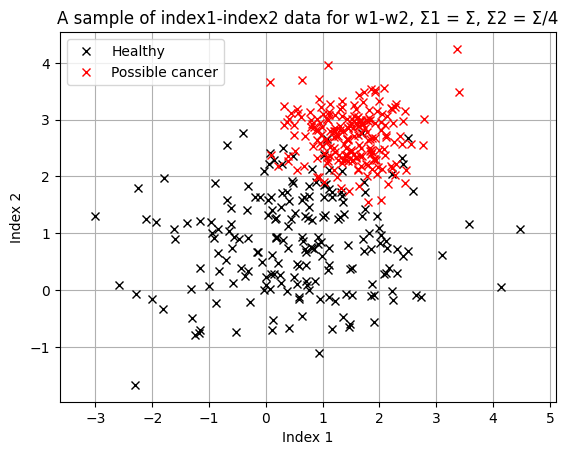

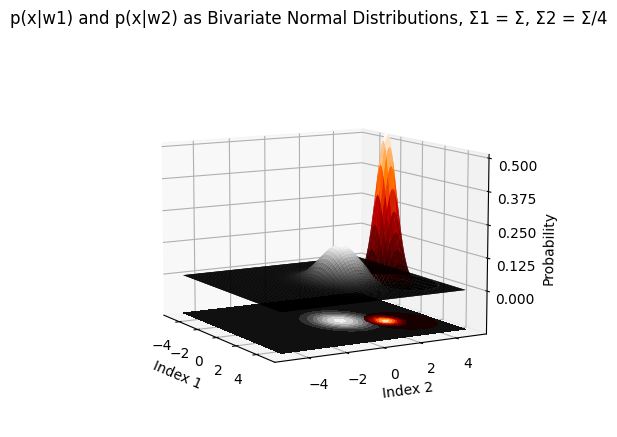

In [9]:
#Question B1

x = np.linspace(-7.5,7.5,200) #Creating a series of data in range of -7.5 to 7.5.
#In reality X can not be negative because there are not negative measurements in blood tests!!!
 
#A function to calculate Y ~ Normal Distrobution
def normal_dist(x , mean , std):
    pdf = (1/(math.sqrt(2*np.pi)*std)) * np.exp(-0.5*((x-mean)/std)**2)
    return pdf

#Apply the above function to x
#p(x|w1) of both medical indeces independently
pdf_w1_i1_b = normal_dist(x,m1[0],s1_i1) #index 1
pdf_w1_i2_b = normal_dist(x,m1[1],s1_i2) #index 2
#p(x|w2) of both medical indeces independently
pdf_w2_i1_b = normal_dist(x,m2[0],s2_i1) #index 1
pdf_w2_i2_b = normal_dist(x,m2[1],s2_i2) #index 2
 
#Plotting the Results for w1(Healthy) and w2(cancer) for index 1
plt.figure(1)
plt.title('p(x|w1) and p(x|w2) for index 1, Σ1 = Σ, Σ2 = Σ/4')
plt.plot(x,pdf_w1_i1_b , color = 'black', label = 'Healthy')
plt.plot(x,pdf_w2_i1_b , color = 'red', label = 'Possible cancer')
plt.legend()
plt.xlabel('Index 1')
plt.ylabel('Probability')
plt.grid()

#Plotting the Results for w1(Healthy) and w2(cancer) for index 2
plt.figure(2)
plt.title('p(x|w1) and p(x|w2) for index 2, Σ1 = Σ, Σ2 = Σ/4')
plt.plot(x,pdf_w1_i2_b , color = 'black', label = 'Healthy')
plt.plot(x,pdf_w2_i2_b , color = 'red', label = 'Possible cancer')
plt.legend()
plt.xlabel('Index 2')
plt.ylabel('Probability')
plt.grid()

#Plotting a random sample of index1-index2 data for w1-w2
plt.figure(3)
plt.title('A sample of index1-index2 data for w1-w2, Σ1 = Σ, Σ2 = Σ/4')
#index1-index2 data for w1
(i1_w1_b, i2_w1_b) = np.random.multivariate_normal(m1, S, 200).T
plt.plot(i1_w1_b, i2_w1_b, 'x',color = 'black', label = 'Healthy')
#index1-index2 data for w2
(i1_w2_b, i2_w2_b) = np.random.multivariate_normal(m2, S/4, 200).T
plt.plot(i1_w2_b, i2_w2_b,'x',color = 'red', label = 'Possible cancer')
plt.legend()
plt.axis('equal')
plt.xlabel('Index 1')
plt.ylabel('Index 2')
plt.grid()

#creating random data for the 2 indeces x1,x2
start_point = -5 #beginning of interval
end_point = 5 #ending of interval
step = 0.05
length_of_data = int((end_point-start_point)/step)
x1 = np.linspace(start_point, end_point, length_of_data)
x2 = np.linspace(start_point, end_point, length_of_data)
x1, x2 = np.meshgrid(x1,x2) 
pos = np.empty(x1.shape + (2,))
pos[:, :, 0] = x1
pos[:, :, 1] = x2
#calculating p(x|w1) and p(x|w2)
pdf_x_w1_b = multivariate_normal(m1,S)
pdf_x_w2_b = multivariate_normal(m2,S/4)
pdf_x_w1_b = pdf_x_w1_b.pdf(pos)
pdf_x_w2_b = pdf_x_w2_b.pdf(pos)
#plotting p(x|w1) and p(x|w2) at the same 3D-figure
fig = plt.figure(4)
fig.suptitle('p(x|w1) and p(x|w2) as Bivariate Normal Distributions, Σ1 = Σ, Σ2 = Σ/4')
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x1, x2, np.where(pdf_x_w1_b<pdf_x_w2_b,pdf_x_w1_b,np.nan), rstride=6, cstride=6, linewidth=1, antialiased=True, cmap=plt.cm.gist_gray)
ax.plot_surface(x1, x2, pdf_x_w2_b, rstride=3, cstride=3, linewidth=1, antialiased=True, cmap=plt.cm.gist_heat)
ax.plot_surface(x1, x2, np.where(pdf_x_w1_b>=pdf_x_w2_b,pdf_x_w1_b,np.nan), rstride=3, cstride=3, linewidth=1, antialiased=True, cmap=plt.cm.gist_gray)
cset = ax.contourf(x1, x2, np.where(pdf_x_w1_b<pdf_x_w2_b,pdf_x_w1_b,np.nan), zdir='z', offset=-0.15, cmap=plt.cm.gist_gray)
cset = ax.contourf(x1, x2, pdf_x_w2_b, zdir='z', offset=-0.15, cmap=plt.cm.gist_heat)
cset = ax.contourf(x1, x2,np.where(pdf_x_w1_b>=pdf_x_w2_b,pdf_x_w1_b,np.nan), zdir='z', offset=-0.15, cmap=plt.cm.gist_gray)
ax.set_xlabel('Index 1')
ax.set_ylabel('Index 2')
ax.set_zlabel('Probability')

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.5)
ax.set_zticks(np.linspace(0,0.5,5))
ax.view_init(10, -30)

The figure shows us the probability of a new measurement X to be inside of a curve depending on each curves probability.


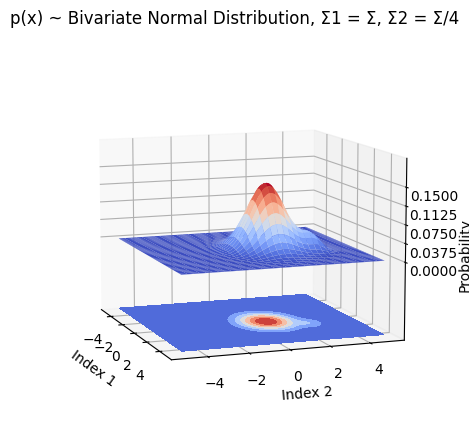

In [10]:
#Question Β2

pdf_x_b = pdf_x_w1_b * p_w1 + pdf_x_w2_b * p_w2 #from theory: p(x) = p(x|w1)*P(w1) + p(x|w2)*P(w2)

#plotting p(x)
fig = plt.figure(5)
fig.suptitle('p(x) ~ Bivariate Normal Distribution, Σ1 = Σ, Σ2 = Σ/4')
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x1, x2, pdf_x_b, rstride=6, cstride=6, linewidth=1, antialiased=True, cmap=plt.cm.coolwarm)
cset = ax.contourf(x1, x2, pdf_x_b, zdir='z', offset=-0.15, cmap=plt.cm.coolwarm)
ax.set_xlabel('Index 1')
ax.set_ylabel('Index 2')
ax.set_zlabel('Probability')

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.15,5))
ax.view_init(10, -20)

print('The figure shows us the probability of a new measurement X to be inside of a curve depending on each curves probability.')

Following the Bayes Decision Rule as we did in part A:
->If P(w1|x) > P(w2|x) we choose w1 (healthy).
->If P(w1|x) < P(w2|x) we choose w2 (possible cancer).
In other words we choose w1 where the black surface is above the red or w2 otherwise.


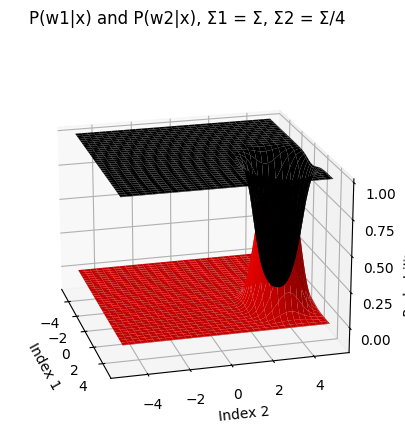

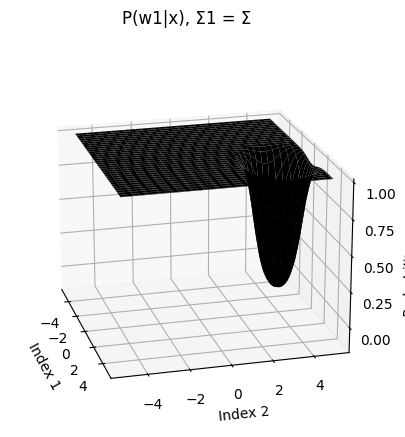

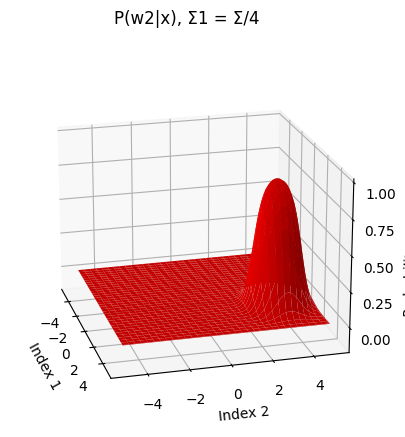

In [11]:
#Question Β3

p_w1_x_b = (pdf_x_w1_b*p_w1)/pdf_x_b #from theory P(wi|x) = (p(x|wi)*P(wi))/p(x)
p_w2_x_b = (pdf_x_w2_b*p_w2)/pdf_x_b

#plotting P(w1|x) and P(w2|x) at the same figure
fig = plt.figure(6)
fig.suptitle('P(w1|x) and P(w2|x), Σ1 = Σ, Σ2 = Σ/4')
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x1, x2, p_w1_x_b, rstride=6, cstride=6, linewidth=1, antialiased=True, color = 'k')
ax.plot_surface(x1, x2, p_w2_x_b, rstride=6, cstride=6, linewidth=1, antialiased=True, color = 'r')
ax.set_xlabel('Index 1')
ax.set_ylabel('Index 2')
ax.set_zlabel('Probability')
# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,1,5))
ax.view_init(20, -15)

#plotting P(w1|x) and P(w2|x) at separate figures
fig = plt.figure(7)
fig.suptitle('P(w1|x), Σ1 = Σ')
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x1, x2, p_w1_x_b, rstride=6, cstride=6, linewidth=1, antialiased=True, color = 'k')
ax.set_xlabel('Index 1')
ax.set_ylabel('Index 2')
ax.set_zlabel('Probability')
# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,1,5))
ax.view_init(20, -15)

fig = plt.figure(8)
fig.suptitle('P(w2|x), Σ1 = Σ/4')
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x1, x2, p_w2_x_b, rstride=6, cstride=6, linewidth=1, antialiased=True, color = 'r')
ax.set_xlabel('Index 1')
ax.set_ylabel('Index 2')
ax.set_zlabel('Probability')
# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,1,5))
ax.view_init(20, -15)

print('Following the Bayes Decision Rule as we did in part A:')
print('->If P(w1|x) > P(w2|x) we choose w1 (healthy).')
print('->If P(w1|x) < P(w2|x) we choose w2 (possible cancer).')
print('In other words we choose w1 where the black surface is above the red or w2 otherwise.')

In [12]:
#Question B4
#we used the P(error) expression from the theory book: P(error) = Σ(p(x|w1)*P(w1)*dx) @ R2 + Σ(p(x|w2)*P(w2)*dx) @ R1
#R1 is the area where P(w1|x) > P(w2|x)
#R2 is the area where P(w2|x) > P(w1|x)
sum1 = 0; #Σ(p(x|w1)*P(w1)*dx) @ R2 
sum2 = 0; #Σ(p(x|w2)*P(w2)*dx) @ R1
dx1dx2 = step*step;
for i in range(0,len(p_w1_x_b)):
    for j in range(0,len(p_w1_x_b)):
        if p_w1_x_b[i][j] < p_w2_x_b[i][j]: #If R2
            sum1 = sum1 + (pdf_x_w1_b[i][j]*p_w1*dx1dx2)
        else:  #If R1
            sum2 = sum2 + (pdf_x_w2_b[i][j]*p_w2*dx1dx2)
Berror = sum1 + sum2
print('The Bayes error (which is also the minimum) is ', Berror, 'or',  round(Berror*100,2),'%')

print('The Bayes error here is smaller because the variance of w2 is 4 times less than before while the variance of w1 is the same.')
print('This makes the data from w2 closer to each other and it is more difficult for a new X of w2 to be far away from the w2 mean and thus misclassified.')

The Bayes error (which is also the minimum) is  0.028737909142630018 or 2.87 %
The Bayes error here is smaller because the variance of w2 is 4 times less than before while the variance of w1 is the same.
This makes the data from w2 closer to each other and it is more difficult for a new X of w2 to be far away from the w2 mean and thus misclassified.
